A STUDY ON UNDERLYING STRUCTURE OF A GOLD PRICE DATASET AND BULIDING FORECASTING MODEL FOR PRICE PREDICTION

A) The main objective is to understand the underlying structure in the dataset

B) come up with a suitable forecasting model which can effectively forecast gold prices for next 30 days.

PROJECT BENEFITS:

a) Can combine with other data mining techniques to understand the behaviour of the data and predict future trends
b) Helps to understand the seasonal patterns
c) Helps in evaluating the current progress, forecasting and detect unusual events
d) Helps the companies develop forecasting techniques to be better prepared fo an uncertain future

STEPS:
   Dataset details
       Importing the neccessary libraries
       Loading the dataset
       Checking the number of rows and columns
       Missing values
       Statistical measures
       Converting date into day, month and year
  Performing EDA
      Pattern analysis
      Stationarity check
  Model Building
      Fit ARIMA model
      Calculate forecasts
      

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

DATASET DETAILS

In [2]:
# Loading the daqta

data = pd.read_csv("C:\\Users\\Swetha\\Desktop\\EXCELR\\DS - PROJECT DETAILS\\Gold_data.csv",header =0,index_col=0,parse_dates=True,squeeze=True)
data.head()

date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
Name: price, dtype: float64

In [3]:
# Conversion of data to dataframe

df = pd.DataFrame(data)
df.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [4]:
# Resetting index 

df_2 = df.reset_index()
df_2

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [5]:
# Checking the number of rows and columns

df_2.shape

(2182, 2)

In [6]:
# Statsistical measures

df_2.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [7]:
#check data for january 2016

df['2016-01']

,price
date,
2016-01-01,2252.600000
2016-01-02,2454.500000
2016-01-03,2708.100000
2016-01-04,2577.800000
2016-01-05,2597.750000
2016-01-06,2617.700000
2016-01-07,2903.800000
2016-01-08,2887.800000
2016-01-09,2813.800000


In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


EXPLORATORY DATA ANALYSIS 

In [9]:
# Rows and columns check

df_2.shape

(2182, 2)

Number of rows = 2182 and 
Number of columns = 2

In [10]:
# Checking for the missing values

df_2.isnull().sum()

date     0
price    0
dtype: int64

There are no missing values

In [11]:
# Splitting the dates

df_2['Day'] = df_2['date'].dt.day
df_2['Month'] = df_2['date'].dt.month
df_2['Year'] = df_2['date'].dt.year
df_2

,date,price,Day,Month,Year
0,2016-01-01,2252.60,1,1,2016
1,2016-01-02,2454.50,2,1,2016
2,2016-01-03,2708.10,3,1,2016
3,2016-01-04,2577.80,4,1,2016
4,2016-01-05,2597.75,5,1,2016
...,...,...,...,...,...
2177,2021-12-17,4394.40,17,12,2021
2178,2021-12-18,4389.50,18,12,2021
2179,2021-12-19,4389.50,19,12,2021
2180,2021-12-20,4354.10,20,12,2021


Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

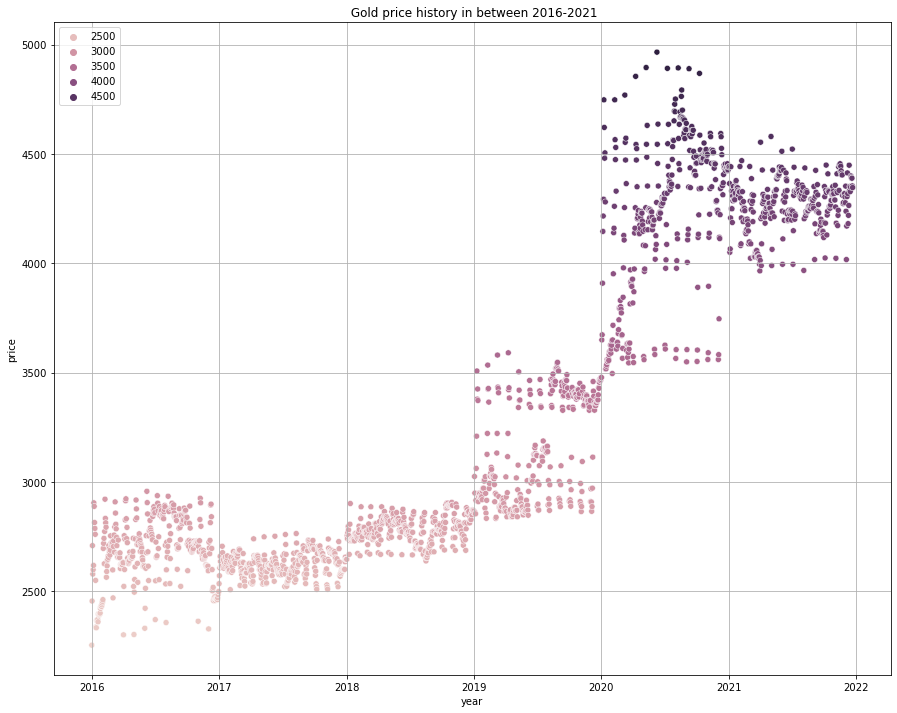

In [12]:
# Scatter plot

fig = plt.subplots(figsize = (15,12))
sns.scatterplot(data=df_2,x='date',y='price',hue = 'price')
plt.title(" Gold price history in between 2016-2021")
plt.xlabel('year')
plt.ylabel('price')
plt.grid("darkgrid")
plt.legend(loc='upper left')
plt.show

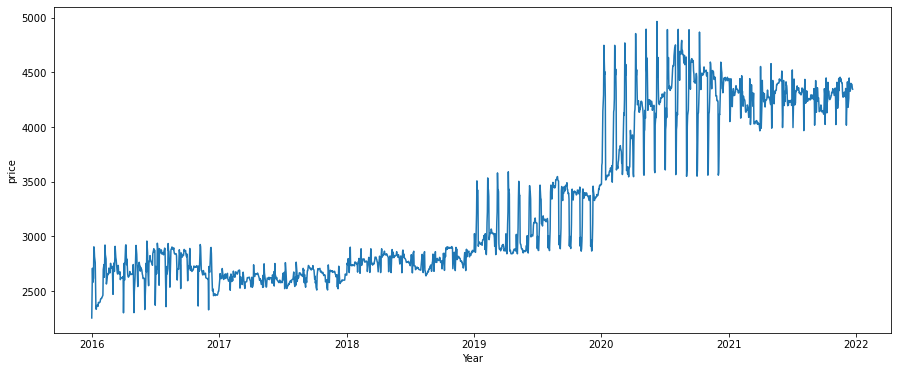

In [13]:
# Line plot

plt.xlabel("Year")
plt.ylabel("price")
plt.plot(df)

<AxesSubplot:xlabel='price', ylabel='Density'>

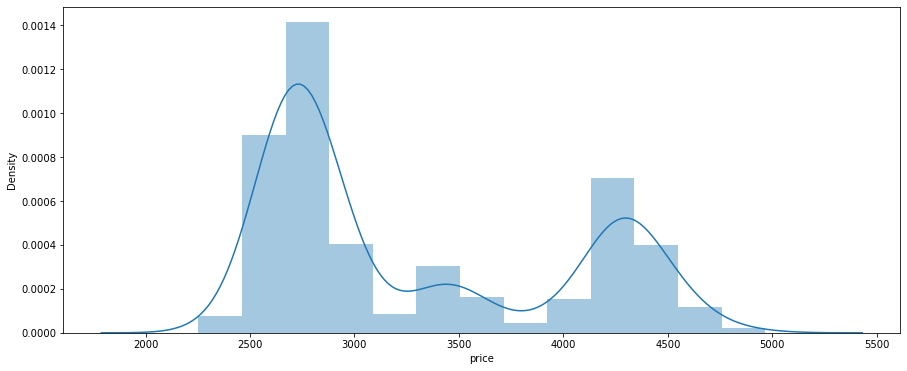

In [14]:
# Density plot

sns.distplot(df_2['price'])

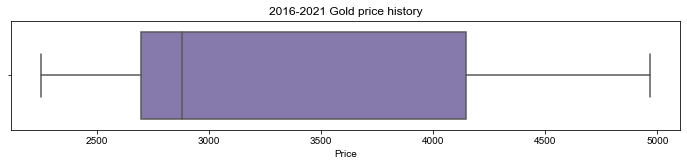

In [15]:
# Box plot for price

fig = plt.subplots(figsize = (12, 2))
sns.set_theme(style="whitegrid")
sns.boxplot( df_2['price'],color ='m')
plt.title("2016-2021 Gold price history")
plt.xlabel('Price')
plt.show()

In [16]:
df_2['price'].mean()

3284.4500458295115

In [17]:
df_2['price'].median()

2879.8

In [18]:
df_2['price'].mode()

0    2598.7
1    2892.7
dtype: float64

Box plot Analysis for price data

1) Mean > Median > Mode
2) Positively skewed distribution of price data

<AxesSubplot:xlabel='Year', ylabel='price'>

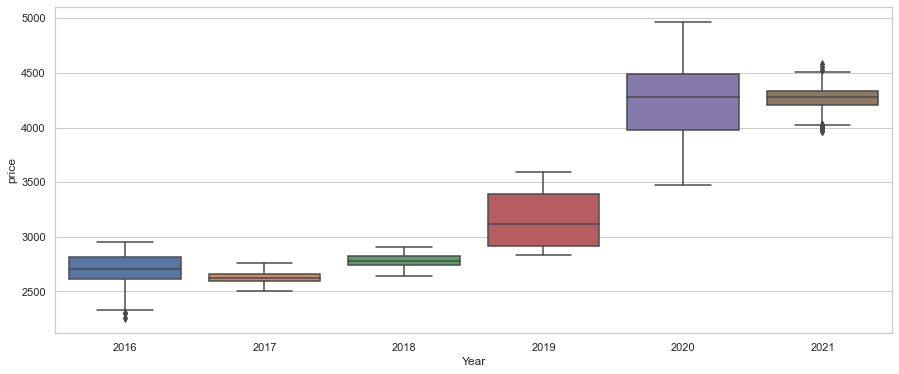

In [19]:
# Yearwise Boxplot

sns.boxplot(x='Year',y='price',data = df_2)

Correlation analysis

The statistical relationship between two variables is referred to as their correlation.

It can be useful to understand the relationships between variables. 

Positive Correlation: both variables change in the same direction.

Neutral Correlation: No relationship in the change of the variables.

Negative Correlation: variables change in opposite directions.


In [20]:
# Display of first five rows

df_2.head()

,date,price,Day,Month,Year
0,2016-01-01,2252.60,1,1,2016
1,2016-01-02,2454.50,2,1,2016
2,2016-01-03,2708.10,3,1,2016
3,2016-01-04,2577.80,4,1,2016
4,2016-01-05,2597.75,5,1,2016


In [21]:
# Display of first five rows

df_2.tail()

,date,price,Day,Month,Year
2177,2021-12-17,4394.4,17,12,2021
2178,2021-12-18,4389.5,18,12,2021
2179,2021-12-19,4389.5,19,12,2021
2180,2021-12-20,4354.1,20,12,2021
2181,2021-12-21,4346.5,21,12,2021


In [22]:
# Type of data

df_2.dtypes

date     datetime64[ns]
price           float64
Day               int64
Month             int64
Year              int64
dtype: object

In [23]:
# Correlation analysis between columns

df_2.corr()

,price,Day,Month,Year
price,1.000000,0.023311,0.075041,0.880318
Day,0.023311,1.000000,0.001173,-0.008684
Month,0.075041,0.001173,1.000000,-0.010417
Year,0.880318,-0.008684,-0.010417,1.000000


<AxesSubplot:>

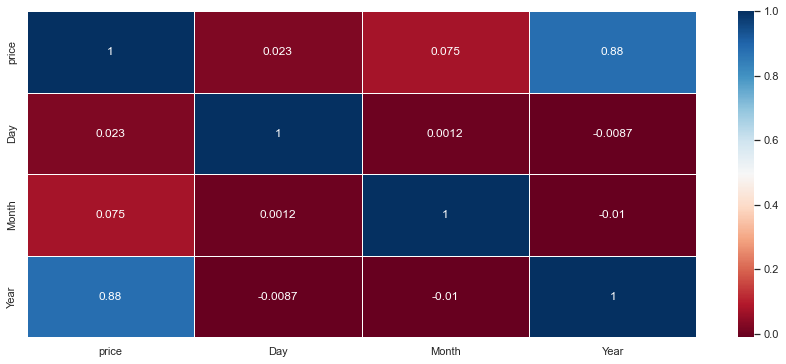

In [24]:
sns.heatmap(df_2.corr(),annot = True,linewidth = 0.9,cmap='RdBu')

In [25]:
gold_d_month_yearly = pd.pivot_table(df_2, values="price",
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
gold_d_month_yearly

Year,2016,2017,2018,2019,2020,2021,All
Month,,,,,,,
1,2495.832258,2626.077957,2748.438710,3015.954839,3803.264516,4305.209677,3165.796326
2,2688.703448,2646.730357,2766.942857,3068.482143,3903.472414,4208.853571,3214.831471
3,2682.854839,2597.485484,2766.806452,2989.967742,3915.170968,4118.264516,3178.425000
4,2677.790000,2620.758333,2806.903333,2970.890000,4187.580000,4259.273333,3253.865833
5,2677.650000,2605.872581,2806.258065,2978.335484,4208.000000,4346.348387,3270.410753
6,2745.596667,2607.733333,2781.715000,3098.686667,4250.550000,4262.783333,3291.177500
7,2779.582258,2599.256452,2739.325806,3136.961290,4393.832258,4308.632258,3326.265054
8,2792.240323,2642.133871,2722.327419,3351.954839,4491.829032,4264.919355,3377.567473
9,2792.705000,2669.835000,2777.303333,3310.843333,4399.250000,4207.506667,3359.573889


In [26]:
import calendar

# Setting the index (month names)
name_index = [[calendar.month_abbr[i] if isinstance(i, int) 
                            
                else i 
                                       for i in list(gold_d_month_yearly.index)]]  
gold_d_month_yearly = gold_d_month_yearly.set_index(name_index)

gold_d_month_yearly

Year,2016,2017,2018,2019,2020,2021,All
Jan,2495.832258,2626.077957,2748.438710,3015.954839,3803.264516,4305.209677,3165.796326
Feb,2688.703448,2646.730357,2766.942857,3068.482143,3903.472414,4208.853571,3214.831471
Mar,2682.854839,2597.485484,2766.806452,2989.967742,3915.170968,4118.264516,3178.425000
Apr,2677.790000,2620.758333,2806.903333,2970.890000,4187.580000,4259.273333,3253.865833
May,2677.650000,2605.872581,2806.258065,2978.335484,4208.000000,4346.348387,3270.410753
Jun,2745.596667,2607.733333,2781.715000,3098.686667,4250.550000,4262.783333,3291.177500
Jul,2779.582258,2599.256452,2739.325806,3136.961290,4393.832258,4308.632258,3326.265054
Aug,2792.240323,2642.133871,2722.327419,3351.954839,4491.829032,4264.919355,3377.567473
Sep,2792.705000,2669.835000,2777.303333,3310.843333,4399.250000,4207.506667,3359.573889
Oct,2720.454839,2648.345161,2851.996774,3300.645161,4388.651613,4289.148387,3366.540323


In [27]:
#Check datatype 

gold_d_month_yearly.dtypes

Year
2016    float64
2017    float64
2018    float64
2019    float64
2020    float64
2021    float64
All     float64
dtype: object

In [28]:
#change datatype float into int

gold_d_month_yearly = gold_d_month_yearly.astype('int')
gold_d_month_yearly.head()

Year,2016,2017,2018,2019,2020,2021,All
Jan,2495,2626,2748,3015,3803,4305,3165
Feb,2688,2646,2766,3068,3903,4208,3214
Mar,2682,2597,2766,2989,3915,4118,3178
Apr,2677,2620,2806,2970,4187,4259,3253
May,2677,2605,2806,2978,4208,4346,3270


In [29]:
gold_d_month_yearly.dtypes

Year
2016    int32
2017    int32
2018    int32
2019    int32
2020    int32
2021    int32
All     int32
dtype: object

Visualization for average gold price

heatmap for average gold price for all months

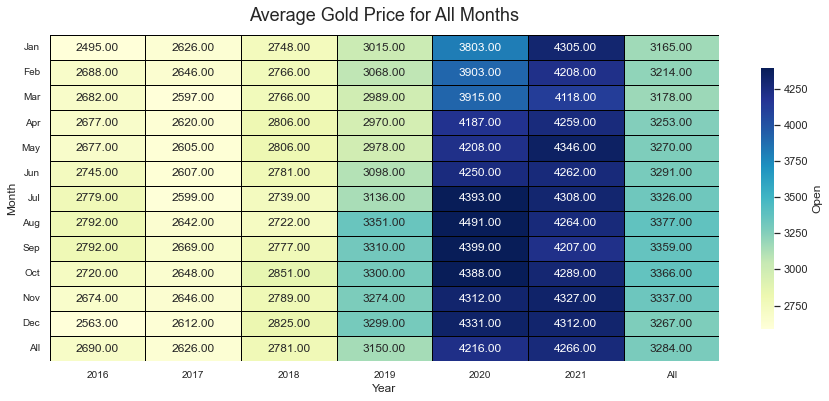

In [30]:
ax = sns.heatmap(gold_d_month_yearly, cmap='YlGnBu', robust=True, fmt='.2f', 
                 annot=True, linewidths=.8,linecolor = 'black', annot_kws={'size':12}, 
                 cbar_kws={'shrink':.8, 'label':'Open'})                       
    
ax.set_yticklabels(ax.get_yticklabels(),rotation=0, fontsize=10)
ax.set_ylabel('Month')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Average Gold Price for All Months', fontdict={'fontsize':18},    pad=14);

Boxplot for average gold price

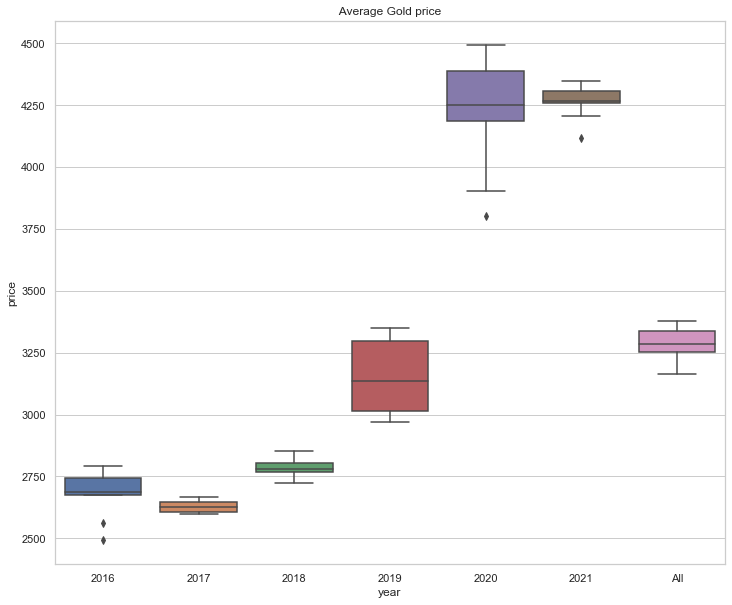

In [31]:
fig = plt.subplots(figsize = (12,10))
sns.boxplot(data = gold_d_month_yearly)
plt.title(" Average Gold price ")
plt.xlabel('year')
plt.ylabel('price')
plt.show()

STATIONARITY CHECK for given dataset

1) Moving average method (Rolling statistics

2) Augumented Dickey Fuller test

In [32]:
df.dtypes

price    float64
dtype: object

In [33]:
df1 = df.astype(int)
df1

,price
date,
2016-01-01,2252
2016-01-02,2454
2016-01-03,2708
2016-01-04,2577
2016-01-05,2597
...,...
2021-12-17,4394
2021-12-18,4389
2021-12-19,4389


In [34]:
ts = df1['price']

In [35]:
ts.head()

date
2016-01-01    2252
2016-01-02    2454
2016-01-03    2708
2016-01-04    2577
2016-01-05    2597
Name: price, dtype: int32

In [36]:
ts_log = np.log(ts)
ts_log.head()

date
2016-01-01    7.719574
2016-01-02    7.805475
2016-01-03    7.903966
2016-01-04    7.854381
2016-01-05    7.862112
Name: price, dtype: float64

1) Stationarity check using moving average method

In [37]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=52,center=False).mean()
    rolstd = timeseries.rolling(window=52,center=False).std()
    
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    

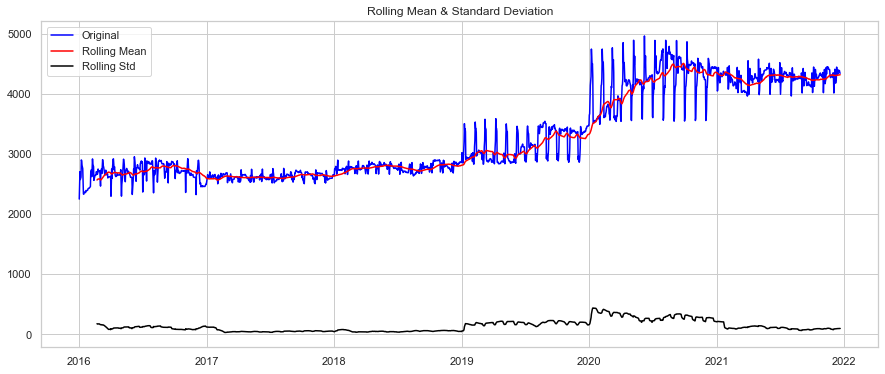

In [38]:
test_stationarity(ts)

Result:
Rolling mean and rolling standards are varying with the time
They are dependent with time
Therefore data is NON STATIONARY

2) Stationarity check using Augumented Dickey Fuller test method

In [39]:
test_result = adfuller(ts)

In [40]:
# H0(Null hypothesis): not stationarity 
# H1(Alternate hypothesis): stationarity 

def adfuller_test(price):
    result = adfuller(price)
    labels = ['adf test statistic','p-value','#lags used','number of observations used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
        print("evidence to reject null hypothesis, indicating to accept alternate ")
    else:
        print("evidence to reject alternate hypothesis, indicating to accept null")

In [41]:
adfuller_test(df_2['price'])

adf test statistic : -0.30990365705047657
p-value : 0.9240899189079188
#lags used : 26
number of observations used : 2155
evidence to reject alternate hypothesis, indicating to accept null


Result:

p-value(0.9240) is greater than 0.05

Therefore the data seems to be NON STATIONARITY

REMOVAL OF NON STATIONARITY 

It can be done by two methods:

1) Decomposition method
2) Differencing method

1) BY DECOMPOSITION method

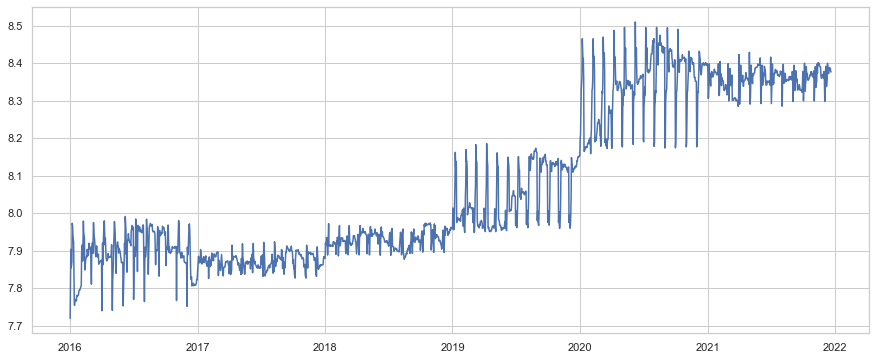

In [42]:
plt.plot(ts_log)

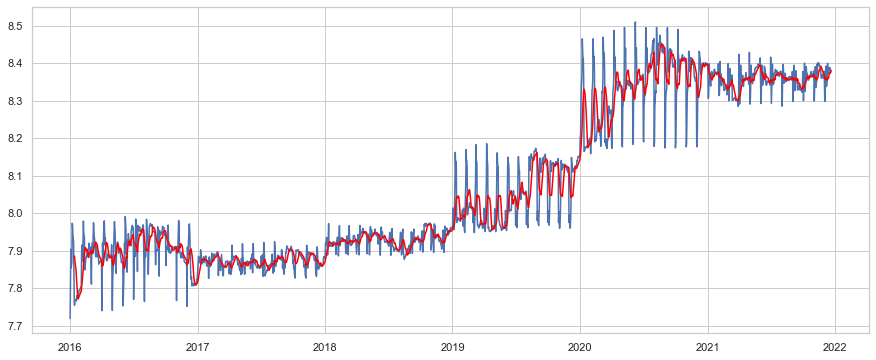

In [43]:
movingAverage = ts_log.rolling(window = 12).mean()
movingSTD = ts_log.rolling(window = 12).std()
plt.plot(ts_log)
plt.plot(movingAverage, color = 'red')

Blue - Original timeseries data
Red - Moving average

Result:
Plot is better when compared to original result
Rolling mean is having less variation 

Therefore data is TRYING TO BE STATIONARY

2) BY DIFFERENCING METHOD

In [44]:
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)

ts_log_mv_diff.dropna(inplace = True)
ts_log_mv_diff.head(10)

date
2016-01-12   -0.039645
2016-01-13   -0.130350
2016-01-14   -0.127386
2016-01-15   -0.102048
2016-01-16   -0.094120
2016-01-17   -0.086005
2016-01-18   -0.077286
2016-01-19   -0.064224
2016-01-20   -0.033891
2016-01-21   -0.020068
Name: price, dtype: float64

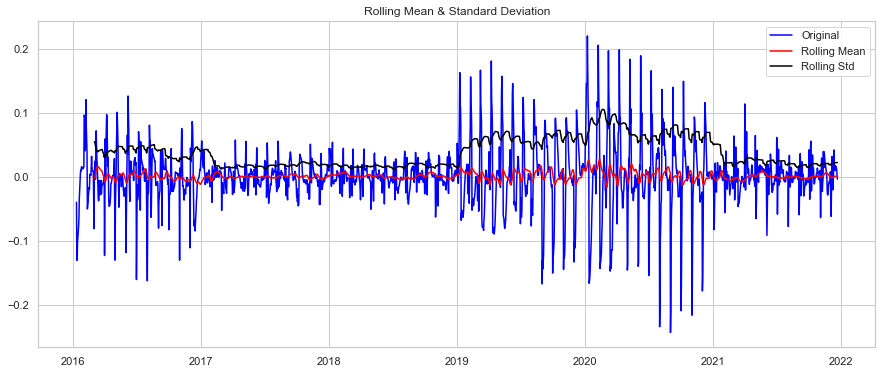

In [45]:
test_stationarity(ts_log_mv_diff)

Blue - Original timeseries data
Red - Moving average
Black - Rolling standard

Result:
Plot is better when compared to original result
Rolling mean and rolling standards are having less variation 

Therefore data is TRYING TO BE STATIONARY

In [46]:
adfuller_test(ts_log_mv_diff)

adf test statistic : -14.936369493918976
p-value : 1.3427106697280453e-27
#lags used : 26
number of observations used : 2144
evidence to reject null hypothesis, indicating to accept alternate 


Adfuller test result:

p-value(1.3427106697280453e-27) is lesser than 0.05

Therefore the data seems to be STATIONARITY

AUTO CORRELATION FUNTION (ACF)

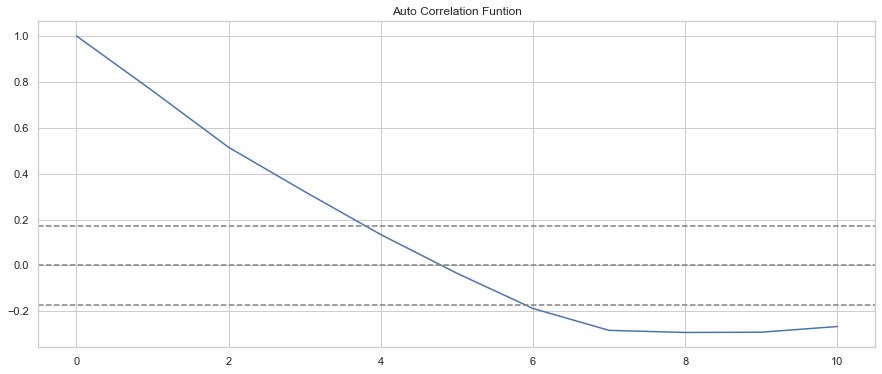

In [47]:
plt.plot(np.arange(0,11),acf(ts_log_mv_diff,nlags =10))
plt.axhline(y=0,linestyle = '--',color = 'gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle = '--',color = 'gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle = '--',color = 'gray')
plt.title('Auto Correlation Funtion')
plt.show()

ACF intepretation:
    Lag value is between 0 and 1
    Optimal value of Q and ARIMA model must be 0 or 1

PARTIAL AUTO CORRELATION FUNTION (PACF)

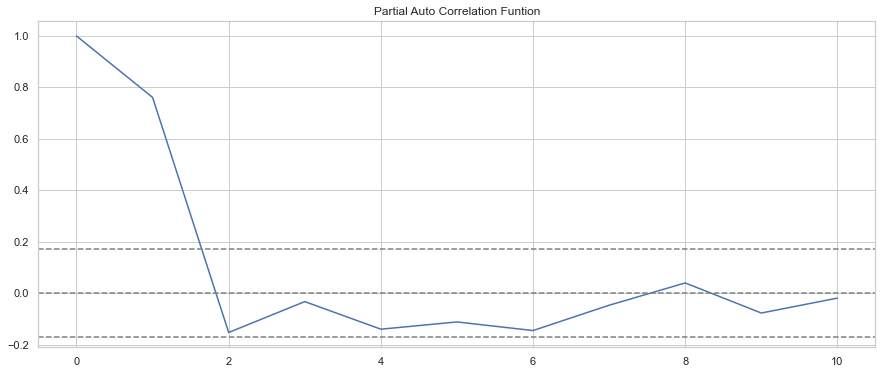

In [48]:
plt.plot(np.arange(0,11),pacf(ts_log_mv_diff,nlags =10))
plt.axhline(y=0,linestyle = '--',color = 'gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle = '--',color = 'gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle = '--',color = 'gray')
plt.title('Partial Auto Correlation Funtion')
plt.show()

PACF intepretation:
    Curve drops to 0 between lag values 1 and 2
    Optimal value of P and ARIMA model must be 1 or 2

MODEL BUILDING

1)Auto Regressive model (AR Model)
2)Moving Average model (MA Model)
3)ARMA (Autoregressive moving average)
4)Auto Regressive Integrated moving Average model (ARIMA Model)
5)SARIMA (Seasonal autoregressive integrated moving average)
6)VAR (Vector autoregression)
7)VARMA (Vector autoregression moving average)
8)SES (Simple exponential smoothing)

SES (SIMPLE EXPONENTIAL SMOOTHING) MODEL

ES forecasts:
- Weighted averages of past observations
- Weights decrease exponentially as the observations get older

Types of EXPONENTIAL SMOOTHING procedure
- Simple Exponential smoothing - No trend or seasonality
- Holt's Linear method - Extends SES to include linear trend
- Holts's winter Exponential smoothing - The most complex procedure which handles both seasonal and trend 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [61]:
data = pd.read_csv("C:\\Users\\Swetha\\Desktop\\EXCELR\\DS - PROJECT DETAILS\\Gold_data.csv",header =0,index_col=0,parse_dates=True,squeeze=True)
data.head()


date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
Name: price, dtype: float64

In [62]:
df = pd.DataFrame(data)
df.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [63]:
# Resetting index 
df_2 = df.reset_index()
df_2.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


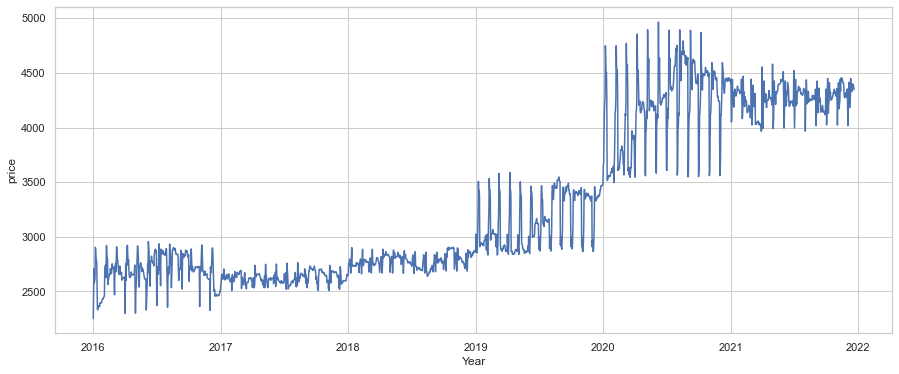

In [64]:
# Line plot

plt.xlabel("Year")
plt.ylabel("price")
plt.plot(df)

In [65]:
df_2.shape

(2182, 2)

In [66]:
# Splitting the dates

df_2['Day'] = df_2['date'].dt.day
df_2['Month'] = df_2['date'].dt.month
df_2['Year'] = df_2['date'].dt.year
df_2

,date,price,Day,Month,Year
0,2016-01-01,2252.60,1,1,2016
1,2016-01-02,2454.50,2,1,2016
2,2016-01-03,2708.10,3,1,2016
3,2016-01-04,2577.80,4,1,2016
4,2016-01-05,2597.75,5,1,2016
...,...,...,...,...,...
2177,2021-12-17,4394.40,17,12,2021
2178,2021-12-18,4389.50,18,12,2021
2179,2021-12-19,4389.50,19,12,2021
2180,2021-12-20,4354.10,20,12,2021


In [67]:
# Splitting the data

Train = df_2.head(1746)
Test =df_2.tail(436)

<AxesSubplot:>

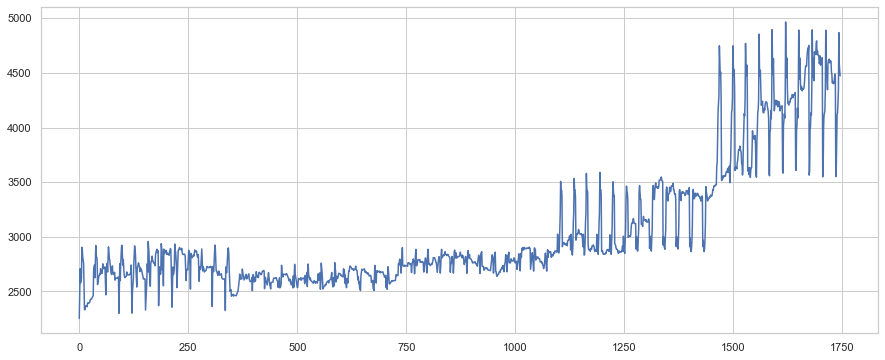

In [68]:
Train['price'].plot()

<AxesSubplot:>

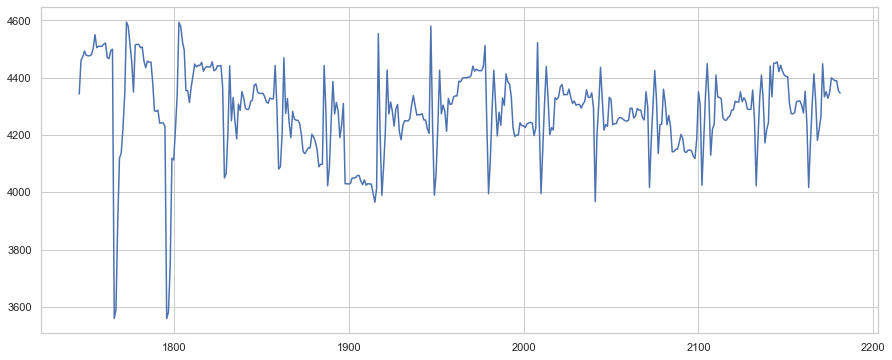

In [69]:
Test['price'].plot()

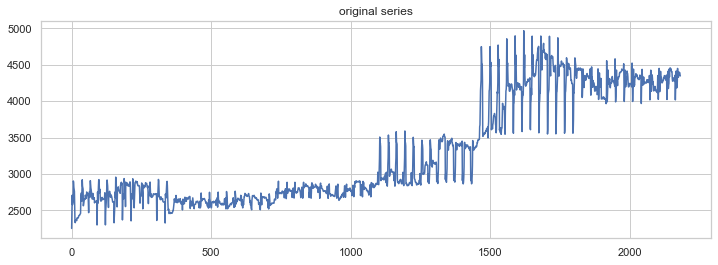

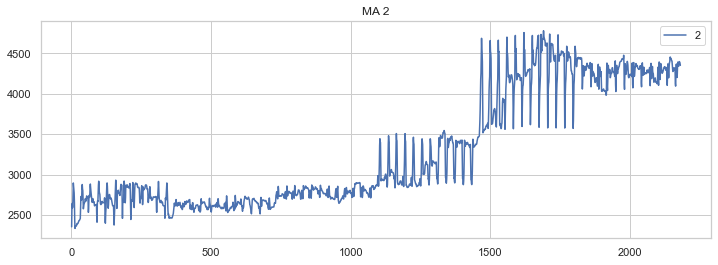

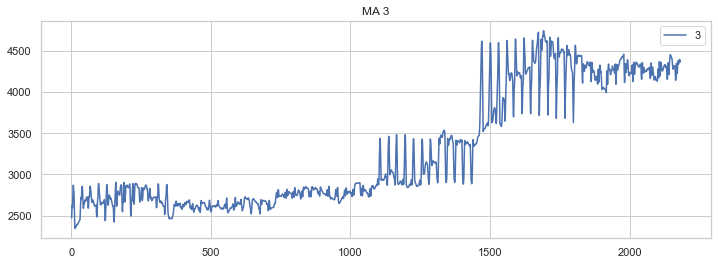

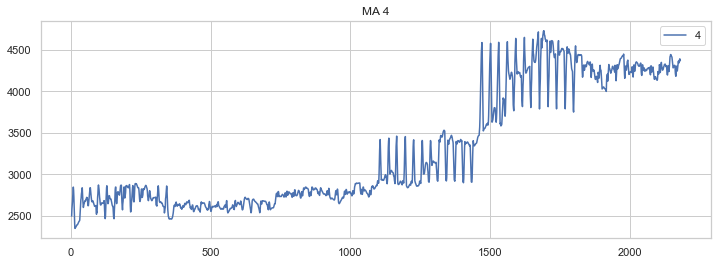

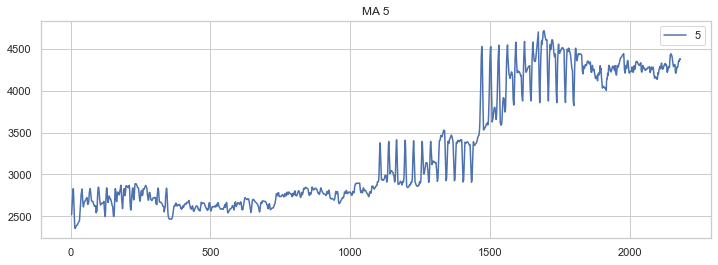

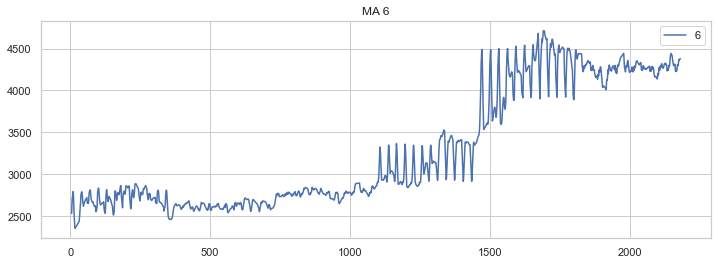

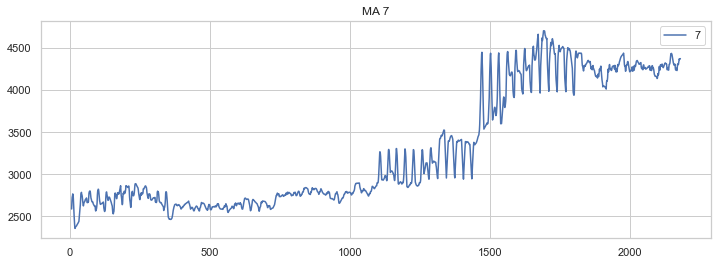

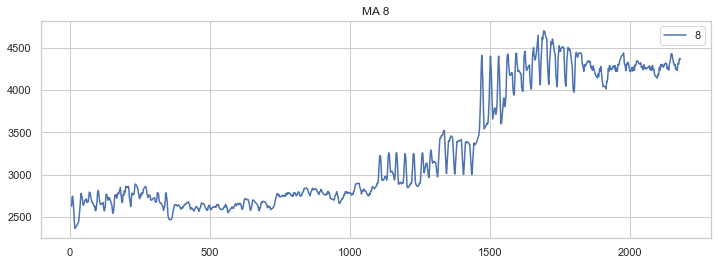

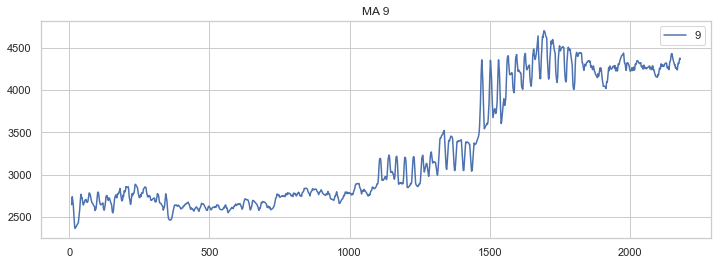

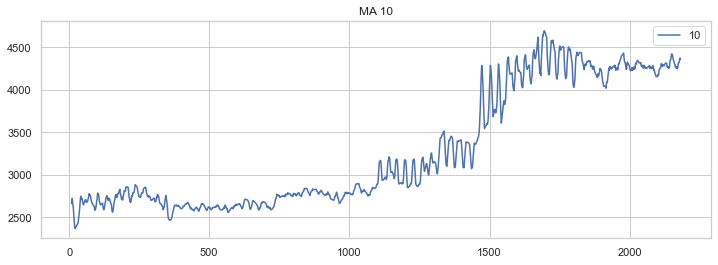

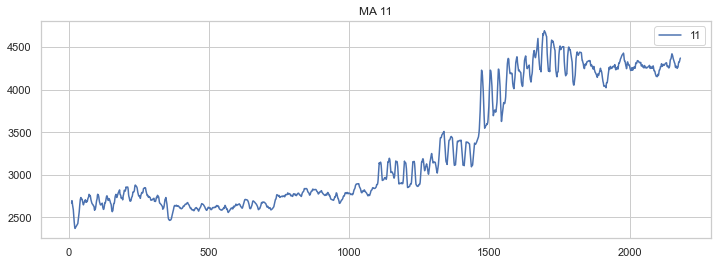

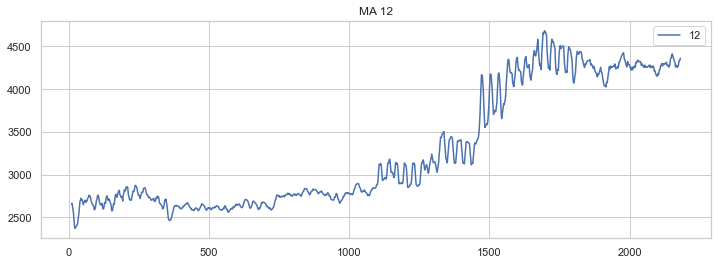

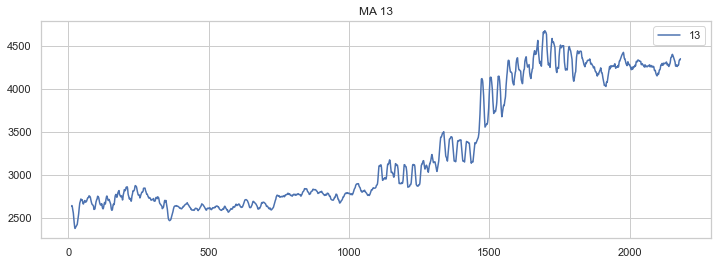

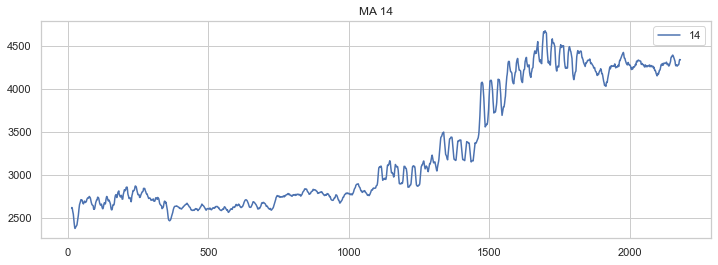

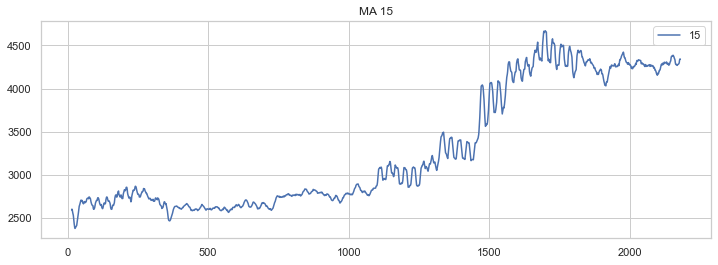

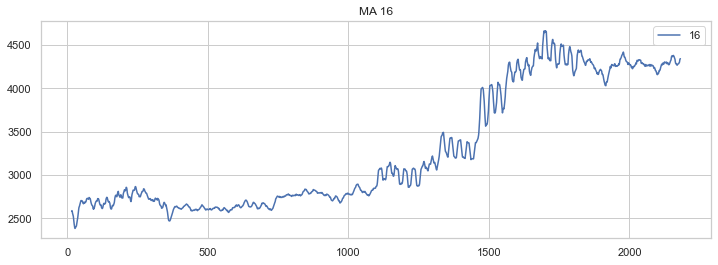

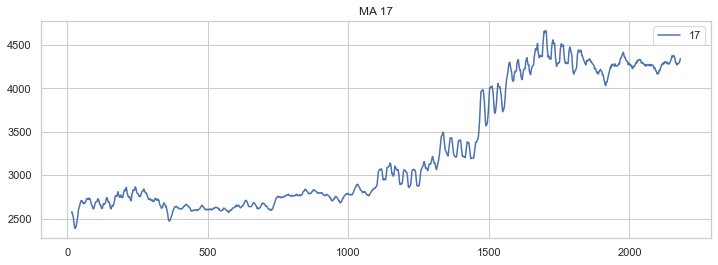

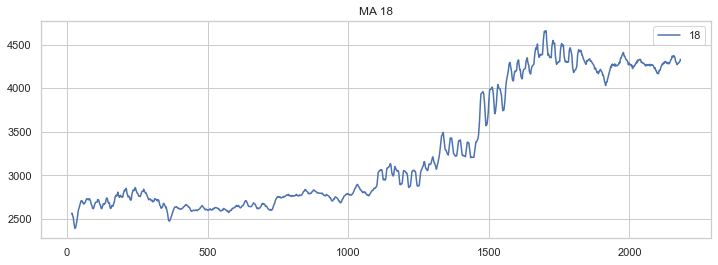

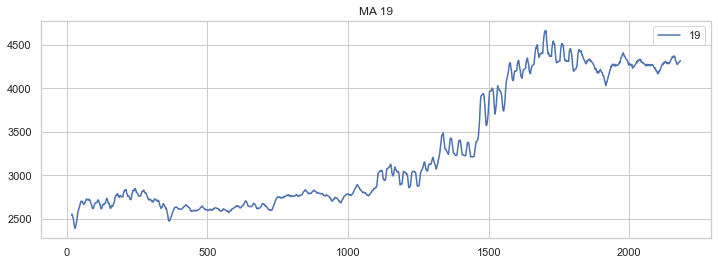

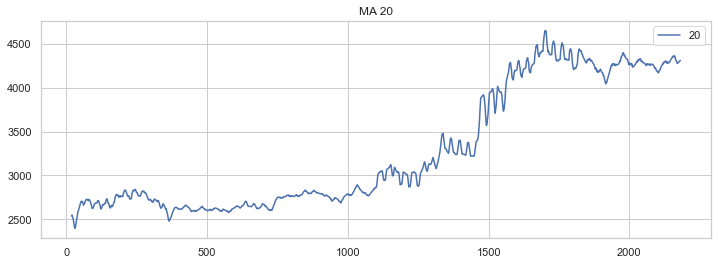

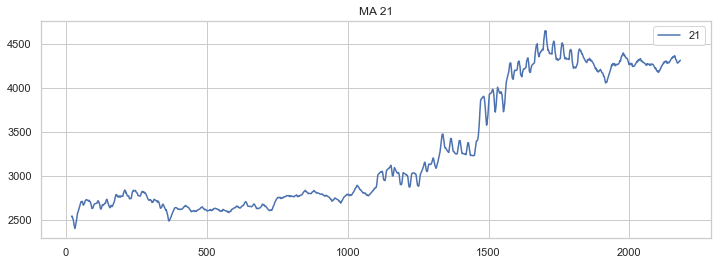

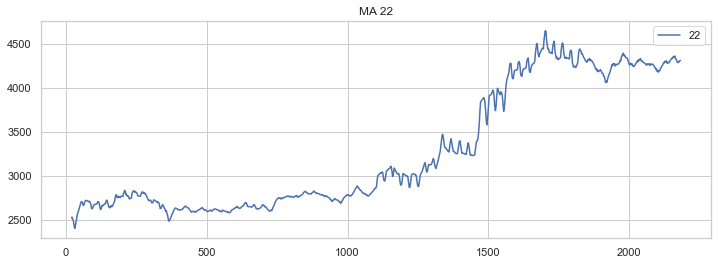

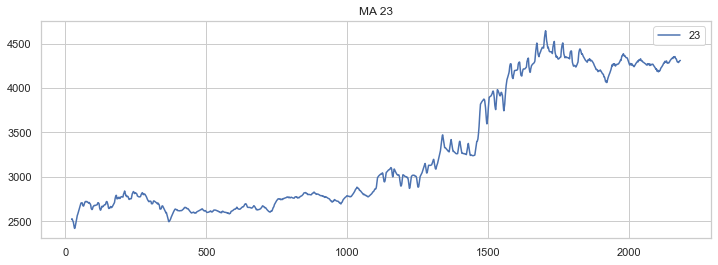

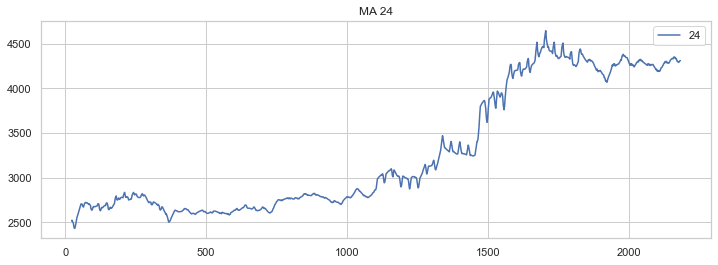

In [70]:
# Stationarity check by Moving average method
# Moving average

plt.figure(figsize=(12,4))
df_2.price.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))


    df_2["price"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

REMOVAL OF NON STATIONARITY

Time series decomposition plot

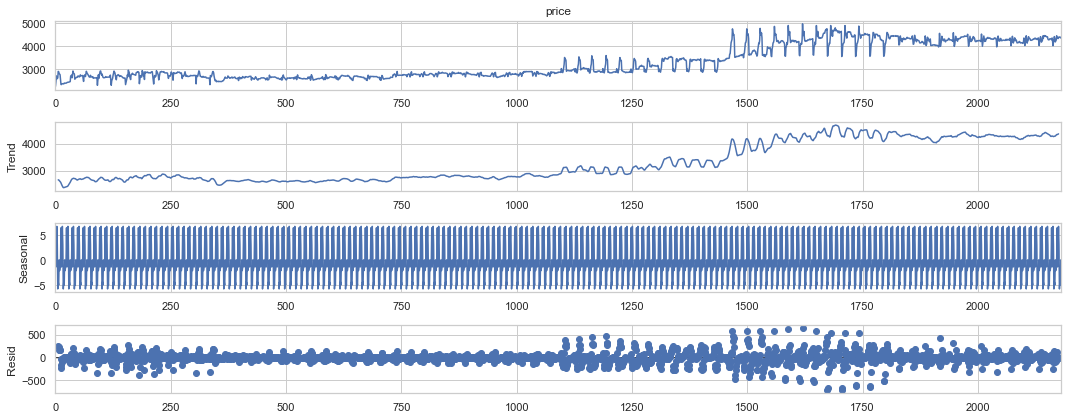

In [71]:
decompose_ts_add = seasonal_decompose(df_2.price,freq=12)
decompose_ts_add.plot()
plt.show()

ACF plots and PACF plots

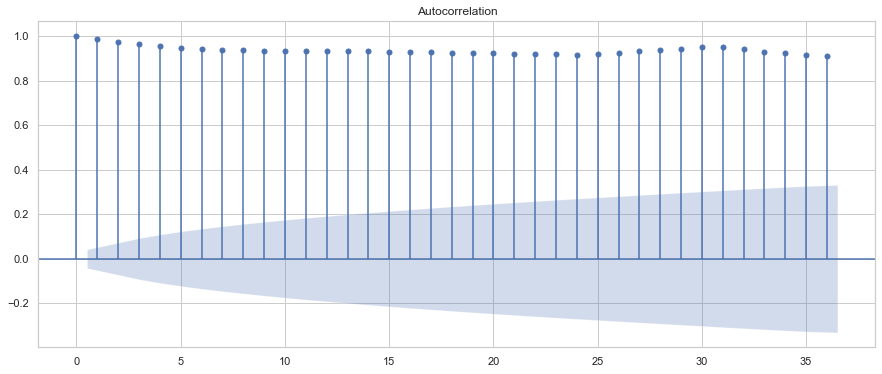

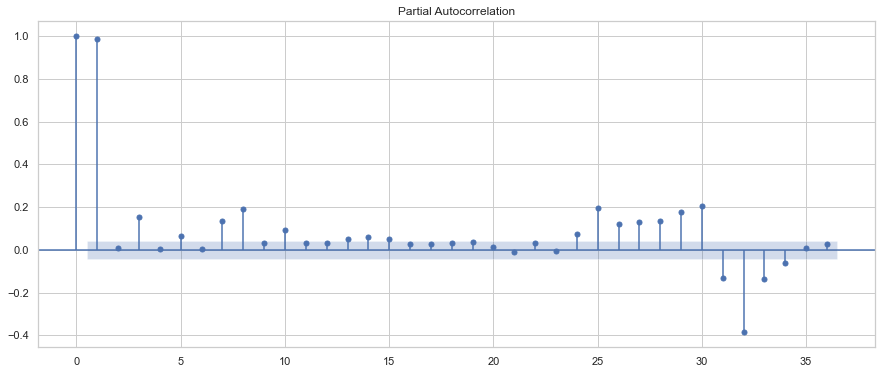

In [72]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df_2.price,lags=36)
tsa_plots.plot_pacf(df_2.price,lags=36)
plt.show()

Evaluation Metric MAPE

In [73]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [74]:
# Example
y=1000
y_pred=999

y=3
y_pred=2

In [75]:
Test.index[0]

1746

In [76]:
Test.index[-1]

2181

Simple Exponential Method

In [77]:
ses_model = SimpleExpSmoothing(Train["price"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.price) 

3.6006597625838337

In [112]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Test.price,pred_ses)
MSE = mean_squared_error(Test.price,pred_ses)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

243.60855002089886


In [78]:
pred_ses

1746    4411.826967
1747    4411.826967
1748    4411.826967
1749    4411.826967
1750    4411.826967
           ...     
2177    4411.826967
2178    4411.826967
2179    4411.826967
2180    4411.826967
2181    4411.826967
Length: 436, dtype: float64

In [79]:
import numpy as np
x=np.arange(0.1,1,0.9/10)
for i in x :
    ses_model = SimpleExpSmoothing(Train["price"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    score=MAPE(pred_ses,Test.price) 
    print("smoothing_level ",i,"-->","MAPE Error",score)

smoothing_level  0.1 --> MAPE Error 2.9915132632534984
smoothing_level  0.19 --> MAPE Error 3.509577189914708
smoothing_level  0.28 --> MAPE Error 4.396405702407338
smoothing_level  0.37 --> MAPE Error 5.095895207939838
smoothing_level  0.45999999999999996 --> MAPE Error 5.395133988865591
smoothing_level  0.5499999999999999 --> MAPE Error 5.409114632628336
smoothing_level  0.64 --> MAPE Error 5.274733671490302
smoothing_level  0.73 --> MAPE Error 5.093085607433873
smoothing_level  0.82 --> MAPE Error 4.921730800887686
smoothing_level  0.9099999999999999 --> MAPE Error 4.784988373107044


Holt method

In [80]:
# Holt method 
hw_model = Holt(Train["price"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.price) 

114.17056599228711

In [111]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Test.price,pred_hw)
MSE = mean_squared_error(Test.price,pred_hw)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

15120.103990649732


In [81]:
pred_hw

1746     4520.502035
1747     4541.834635
1748     4563.167236
1749     4584.499836
1750     4605.832436
            ...     
2177    13714.852734
2178    13736.185334
2179    13757.517934
2180    13778.850534
2181    13800.183134
Length: 436, dtype: float64

In [82]:
import numpy as np
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)

for i in alphas :
    for j in betas:
        hw_model = Holt(Train["price"]).fit(smoothing_level=i, smoothing_slope=j)
        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
        score=MAPE(pred_hw,Test.price)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 14.864723966414443
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 8.848753319297
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 21.487926284240775
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 185.94174309363143
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 470.9458977994804
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 699.9507595246221
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 803.4581813669056
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 817.7754533023636
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 816.4303295177117
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 840.5832034094998
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 40.28862218717666
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 176.29791975142044
smoothing_level  0.19  smoothing_slope 0.28 

smoothing_level  0.9099999999999999  smoothing_slope 0.73 --> MAPE Error 338.603082431858
smoothing_level  0.9099999999999999  smoothing_slope 0.82 --> MAPE Error 335.7219014128967
smoothing_level  0.9099999999999999  smoothing_slope 0.9099999999999999 --> MAPE Error 305.4040599940931


Holts winter exponential smoothing with additive seasonality and additive trend

In [83]:
hwe_model_add_add = ExponentialSmoothing(Train["price"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.price) 

12.361703352232531

In [113]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Test.price,pred_hwe_add_add)
MSE = mean_squared_error(Test.price,pred_hwe_add_add)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

583.9486908710755


Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [84]:
hwe_model_mul_add = ExponentialSmoothing(Train["price"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.price)

14.7464508246218

In [114]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Test.price,pred_hwe_mul_add)
MSE = mean_squared_error(Test.price,pred_hwe_mul_add)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

697.9552952509619


Final Model by combining train and test

In [85]:
hwe_model_add_add = ExponentialSmoothing(df_2["price"],seasonal="add",trend="add",seasonal_periods=12)
model = hwe_model_add_add.fit()
model

In [86]:
#Forecasting for next n time periods
model.forecast(436)

2182    4404.489550
2183    4418.578259
2184    4357.762301
2185    4316.561672
2186    4273.491615
           ...     
2613    5005.190350
2614    5054.218306
2615    5068.307015
2616    5007.491057
2617    4966.290428
Length: 436, dtype: float64

In [91]:
gold_price_prediction = model.forecast(436)

gold_price_prediction

2182    4404.489550
2183    4418.578259
2184    4357.762301
2185    4316.561672
2186    4273.491615
           ...     
2613    5005.190350
2614    5054.218306
2615    5068.307015
2616    5007.491057
2617    4966.290428
Length: 436, dtype: float64

<AxesSubplot:>

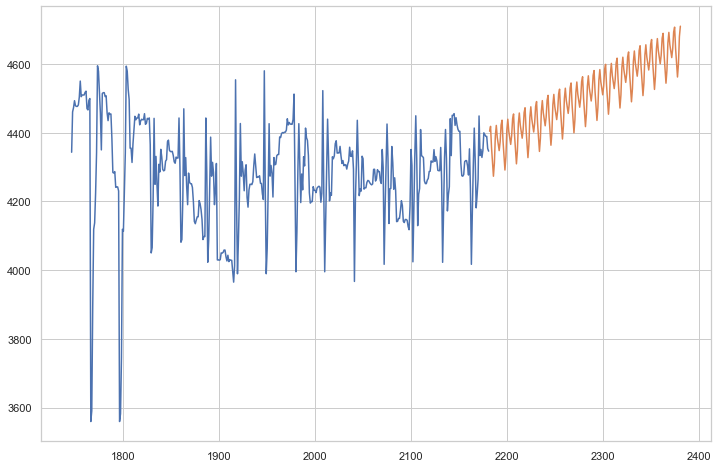

In [92]:
Test['price'].plot(figsize = (12,8))
model.forecast(200).plot()

<AxesSubplot:>

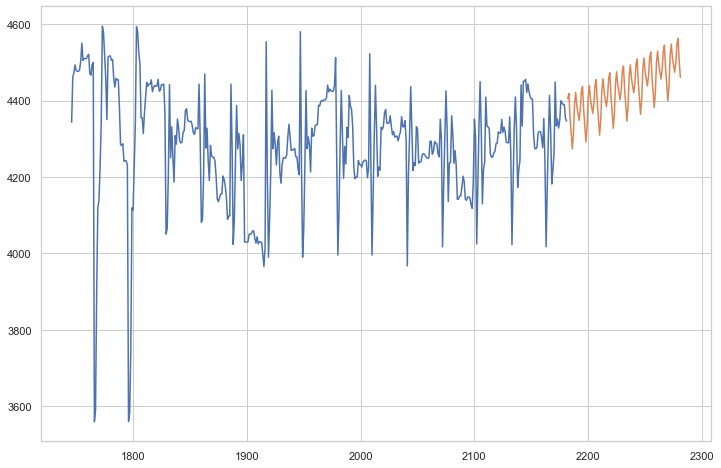

In [93]:
Test['price'].plot(figsize = (12,8))
model.forecast(100).plot()

In [97]:
#Forecasting for next n time periods
model.forecast(30)

2182    4404.489550
2183    4418.578259
2184    4357.762301
2185    4316.561672
2186    4273.491615
2187    4311.449096
2188    4391.194715
2189    4421.372732
2190    4386.296510
2191    4366.507972
2192    4348.067463
2193    4373.509616
2194    4422.537571
2195    4436.626280
2196    4375.810322
2197    4334.609693
2198    4291.539636
2199    4329.497117
2200    4409.242736
2201    4439.420753
2202    4404.344531
2203    4384.555993
2204    4366.115484
2205    4391.557637
2206    4440.585592
2207    4454.674301
2208    4393.858343
2209    4352.657714
2210    4309.587657
2211    4347.545138
dtype: float64

In [99]:
gold_price_prediction = model.forecast(30)

gold_price_prediction

2182    4404.489550
2183    4418.578259
2184    4357.762301
2185    4316.561672
2186    4273.491615
2187    4311.449096
2188    4391.194715
2189    4421.372732
2190    4386.296510
2191    4366.507972
2192    4348.067463
2193    4373.509616
2194    4422.537571
2195    4436.626280
2196    4375.810322
2197    4334.609693
2198    4291.539636
2199    4329.497117
2200    4409.242736
2201    4439.420753
2202    4404.344531
2203    4384.555993
2204    4366.115484
2205    4391.557637
2206    4440.585592
2207    4454.674301
2208    4393.858343
2209    4352.657714
2210    4309.587657
2211    4347.545138
dtype: float64

In [100]:
gold_price_prediction.shape

(30,)

In [101]:
Prediction = pd.Series(gold_price_prediction)

In [102]:
import pandas as pd

from pickle import dump
from pickle import load

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [104]:
dt = pd.read_csv("C:\\Users\\Swetha\\Desktop\\EXCELR\DS - PROJECT DETAILS\\Gold_data.csv")

In [105]:
Train = df_2.head(1746)
Test =df_2.tail(436)

In [106]:
model = ExponentialSmoothing(df_2["price"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [107]:
pred = model.forecast(30).rename("price")

In [108]:
index_future_dates=pd.date_range(start='2021-12-22',end='2022-01-20')

In [109]:
pred.index=index_future_dates.rename("date")

In [110]:
preddf = pd.DataFrame(pred)
preddf

,price
date,
2021-12-22,4404.489550
2021-12-23,4418.578259
2021-12-24,4357.762301
2021-12-25,4316.561672
2021-12-26,4273.491615
2021-12-27,4311.449096
2021-12-28,4391.194715
2021-12-29,4421.372732
2021-12-30,4386.296510


In [ ]:
# save the model to disk
dump(model, open('gold_prediction_model.sav', 'wb'))

# load the model from disk
loaded_model = load(open('gold_prediction_model.sav', 'rb'))
result = loaded_model.forecast(30)
print(result)